In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
import numpy as np

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)

# Now you should be able to import
from interactions import ppo_interaction as ppo
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_config
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_texasholdem_config
from configs.ppo_configs import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.llm_configs import texas_holdem_llm_agent_configs
# from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs

In [ ]:
ppo_interaction = ppo.PPO_interaction(interaction_configs=ppo_interaction_config_texas,
                    env_configs = texas_holdem_config,
                      actor_configs = actor_configs_texas,
                      critic_configs = critic_configs_texas,
                      llm_configs=texas_holdem_llm_agent_configs
                  )

train_scores, trained_agents = ppo_interaction.train_multiagent()
print(train_scores)


🖥  Using device: cpu
self obs size: 76


100%|██████████| 100/100 [00:00<00:00, 301.19it/s]


[np.float64(-0.5), np.float64(-0.5), np.float64(-3.0), np.float64(2.0), np.float64(1.0), np.float64(-4.0), np.float64(2.0), np.float64(0.5), np.float64(-3.0), np.float64(0.5), np.float64(0.5), np.float64(-3.0), np.float64(1.0), np.float64(-0.5), np.float64(1.0), np.float64(0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-1.0), np.float64(3.0), np.float64(2.0), np.float64(-1.0), np.float64(-0.5), np.float64(0.5), np.float64(-0.5), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(-0.5), np.float64(-0.5), np.float64(1.0), np.float64(-0.5), np.float64(-1.0), np.float64(0.5), np.float64(-0.5), np.float64(-1.0), np.float64(-0.5), np.float64(-0.5), np.float64(-2.0), np.float64(0.5), np.float64(-0.5), np.float64(-3.0), np.float64(-3.0), np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(1.0), np.float64(-0.5), np.float64(0.5), np.float64(3.0), np.float64(2.0), np.float64(1.0), np.float64(1.0), np.float64(-1.0), np.float64(1.0), np.float64(-1.0), np.float64(-1.0)

100%|██████████| 2000/2000 [00:05<00:00, 378.51it/s]

[np.float64(-1.0), np.float64(-0.5), np.float64(-0.5), np.float64(1.0), np.float64(-3.0), np.float64(-1.0), np.float64(-2.0), np.float64(-1.0), np.float64(-1.0), np.float64(-5.0), np.float64(-1.0), np.float64(-1.0), np.float64(-0.5), np.float64(-0.5), np.float64(1.0), np.float64(2.0), np.float64(0.5), np.float64(1.0), np.float64(-2.0), np.float64(-1.0), np.float64(-1.0), np.float64(3.0), np.float64(-2.0), np.float64(-1.0), np.float64(1.0), np.float64(-1.0), np.float64(-2.0), np.float64(-3.0), np.float64(3.0), np.float64(1.0), np.float64(-2.0), np.float64(-2.0), np.float64(-1.0), np.float64(-1.0), np.float64(-1.0), np.float64(1.0), np.float64(0.5), np.float64(-0.5), np.float64(-3.0), np.float64(-3.0), np.float64(1.0), np.float64(2.0), np.float64(-0.5), np.float64(2.0), np.float64(-0.5), np.float64(-0.5), np.float64(-3.0), np.float64(-1.0), np.float64(-3.0), np.float64(-0.5), np.float64(1.0), np.float64(2.0), np.float64(0.5), np.float64(-3.0), np.float64(-1.0), np.float64(-0.5), np.float

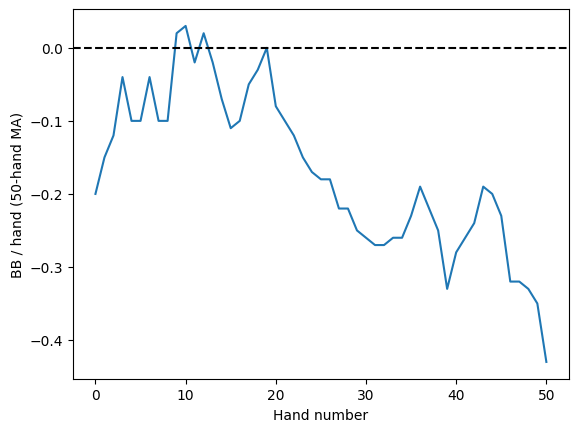

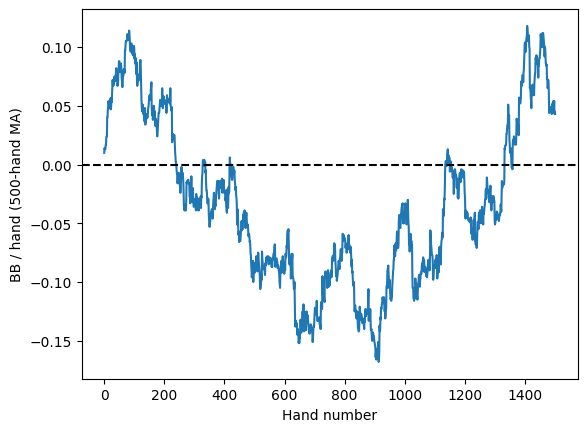

In [21]:

import matplotlib.pyplot as plt

window = 50
rolling = np.convolve(train_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()

window = 500
rolling = np.convolve(test_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()


# fig, (ax1, ax2)  = plt.subplots(1, 2)
# ax1.set_title("Training Scores")
# ax1.set_xlabel("Episodes")
# ax1.set_ylabel("Score")
# ax1.plot(train_scores)
# ax1.grid(True)

# ax2.set_title("Testing Scores")
# ax2.set_xlabel("Episodes")
# ax2.set_ylabel("Score")
# ax2.plot(test_scores)
# ax2.grid(True)

# plt.tight_layout()

# plt.show()


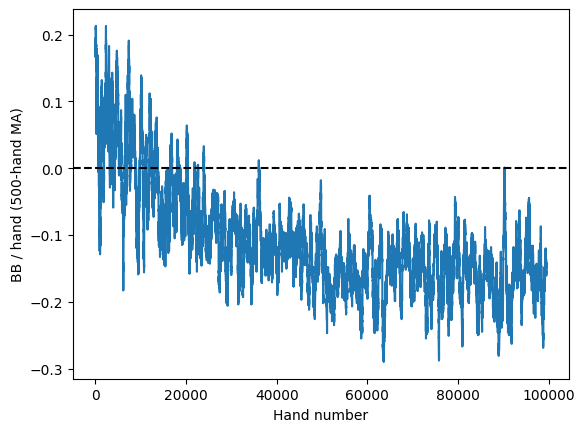

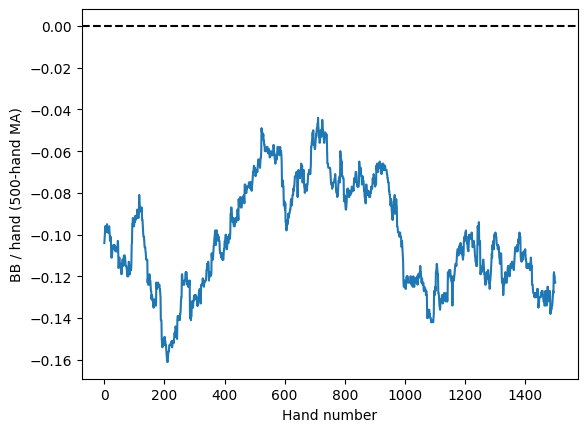

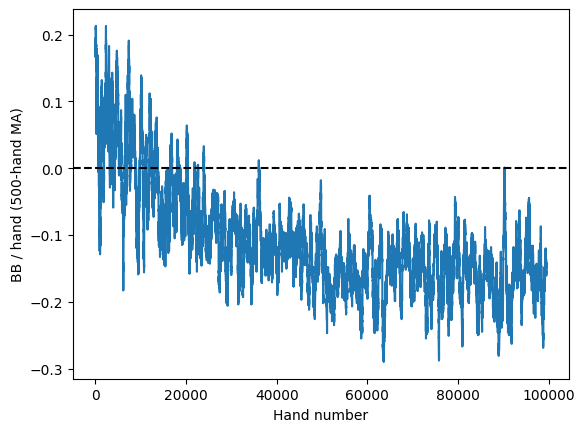

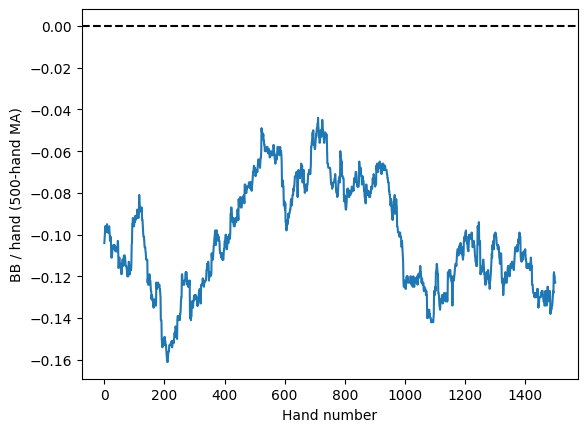

## PPO Example: LunarLander

In [ ]:
ppo_interaction = ppo.PPO_interaction(interaction_config=ppo_interaction_config,
                      actor_configs = actor_configs,
                      critic_configs = critic_configs
                  )

train_scores, trained_agents = ppo_interaction.train()

In [ ]:
test_scores = ppo_interaction.test()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()

